In [1]:
import os
import sys
import numpy as np
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from preprocessing import *
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from preprocessing import downsample_word_vectors, make_delayed

# === Load raw_text.pkl (contains tokenized words for each story) ===
pkl_path = '/ocean/projects/mth240012p/shared/data/raw_text.pkl'
with open(pkl_path, 'rb') as f:
    raw_text = pickle.load(f)

/var/tmp/ipykernel_97239/504994913.py:15: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  raw_text = pickle.load(f)


In [2]:
import random
random.seed(42)
keys = list(raw_text.keys())
random.shuffle(keys)
train_keys = keys[:80]
test_keys = keys[80:]

In [3]:
story = 'avatar'
train_X_path_2 = "../data/w2v/train"
x_file = os.path.join(train_X_path_2, f"delayed_{story}.npz")
X = np.load(x_file)['data'].astype(np.float32)
X.shape

(367, 1200)

# Subject2

In [4]:
import os
import numpy as np
import gc

train_X_path_2 = "../data/w2v/train"
train_Y_path_2 = "/ocean/projects/mth240012p/shared/data/subject2"

valid_stories = []
total_rows = 0
dim_X, dim_Y = None, None

for story in train_keys:
    x_file = os.path.join(train_X_path_2, f"delayed_{story}.npz")
    y_file = os.path.join(train_Y_path_2, f"{story}.npy")

    if not os.path.exists(y_file):
        print(f"⚠️ Missing Y file: {y_file}. Skipping {story}.")
        continue

    try:
        X = np.load(x_file)['data'].astype(np.float32)
        Y = np.load(y_file).astype(np.float32)

        if np.any(np.isnan(Y)) or X.shape[0] != Y.shape[0]:
            print(f"⚠️ Invalid data in {story}. Skipping.")
            continue

        if dim_X is None:
            dim_X = X.shape[1]
            dim_Y = Y.shape[1]

        total_rows += X.shape[0]
        valid_stories.append((story, X.shape[0]))  # 保存有效故事和长度

    except Exception as e:
        print(f"❌ Error loading {story}: {e}")
        continue

print(f"✅ Total valid rows: {total_rows}, dim_X: {dim_X}, dim_Y: {dim_Y}")


X_train = np.empty((total_rows, dim_X), dtype=np.float32)
Y_train = np.empty((total_rows, dim_Y), dtype=np.float32)

start = 0
for story, n_rows in valid_stories:
    x_file = os.path.join(train_X_path_2, f"delayed_{story}.npz")
    y_file = os.path.join(train_Y_path_2, f"{story}.npy")

    X = np.load(x_file)['data'].astype(np.float32)
    Y = np.load(y_file).astype(np.float32)

    end = start + n_rows
    X_train[start:end] = X
    Y_train[start:end] = Y
    start = end

    del X, Y
    gc.collect()

print("✅ X_train and Y_train successfully constructed.")


⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject2/dialogue6.npy. Skipping dialogue6.
⚠️ Invalid data in fromboyhoodtofatherhood. Skipping.
⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject2/dialogue2.npy. Skipping dialogue2.
⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject2/dialogue5.npy. Skipping dialogue5.
⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject2/dialogue3.npy. Skipping dialogue3.
⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject2/onlyonewaytofindout.npy. Skipping onlyonewaytofindout.
✅ Total valid rows: 25290, dim_X: 1200, dim_Y: 94251
✅ X_train and Y_train successfully constructed.


In [5]:
import os
import numpy as np
import gc

test_X_path_2 = "../data/w2v/test"
test_Y_path_2 = "/ocean/projects/mth240012p/shared/data/subject2"


valid_test_stories = []
total_rows_test = 0
dim_X, dim_Y = None, None

for story in test_keys:
    x_file = os.path.join(test_X_path_2, f"delayed_{story}.npz")
    y_file = os.path.join(test_Y_path_2, f"{story}.npy")

    if not os.path.exists(y_file):
        print(f"⚠️ Missing Y file: {y_file}. Skipping {story}.")
        continue

    try:
        X = np.load(x_file)['data'].astype(np.float32)
        Y = np.load(y_file).astype(np.float32)

        if np.any(np.isnan(Y)) or X.shape[0] != Y.shape[0]:
            print(f"⚠️ Invalid data in {story}. Skipping.")
            continue

        if dim_X is None:
            dim_X = X.shape[1]
            dim_Y = Y.shape[1]

        total_rows_test += X.shape[0]
        valid_test_stories.append((story, X.shape[0]))

    except Exception as e:
        print(f"❌ Error loading {story}: {e}")
        continue

print(f"✅ Total valid test rows: {total_rows_test}")


X_test = np.empty((total_rows_test, dim_X), dtype=np.float32)
Y_test = np.empty((total_rows_test, dim_Y), dtype=np.float32)

start = 0
for story, n_rows in valid_test_stories:
    x_file = os.path.join(test_X_path_2, f"delayed_{story}.npz")
    y_file = os.path.join(test_Y_path_2, f"{story}.npy")

    X = np.load(x_file)['data'].astype(np.float32)
    Y = np.load(y_file).astype(np.float32)

    end = start + n_rows
    X_test[start:end] = X
    Y_test[start:end] = Y
    start = end

    del X, Y
    gc.collect()

print("✅ X_test and Y_test successfully constructed.")


⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject2/dialogue1.npy. Skipping dialogue1.
⚠️ Invalid data in canplanetearthfeedtenbillionpeoplepart3. Skipping.
⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject2/dialogue4.npy. Skipping dialogue4.
⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject2/myfirstdaywiththeyankees.npy. Skipping myfirstdaywiththeyankees.
✅ Total valid test rows: 8719
✅ X_test and Y_test successfully constructed.


In [7]:
from sklearn.linear_model import Ridge
from ridge_utils.ridge import ridge_corr, zs

alphas = [0.5]
Rcorrs = ridge_corr(X_train, X_test, Y_train, Y_test, alphas)
mean_ccs = [np.mean(c) for c in Rcorrs]
idx_2 = int(np.argmax(mean_ccs))
alpha_2 = alphas[idx_2]
ccs_2 = Rcorrs[idx_2]
print(f"alpha: {alpha_2:.2f}")
print(f"Mean CC:    {np.mean(ccs_2):.4f}")

alpha: 0.50
Mean CC:    0.0050


In [15]:
with open('ccs_2.pkl', 'wb') as f:
    pickle.dump(ccs_2, f)

In [14]:
from ridge_utils.ridge import bootstrap_ridge
alphas = np.logspace(0, 2, 10)
wt_2, corrs_2, valphas_2, allRcorrs_2, valinds_2 = bootstrap_ridge(
    X_train, Y_train, X_test, Y_test, alphas, 15, 10, 500)

print(f"Mean CC:    {np.mean(corrs_2):.4f}")
print(f"Median CC:  {np.median(corrs_2):.4f}")
print(f"Top 1% CC:  {np.percentile(corrs_2, 99):.4f}")
print(f"Top 5% CC:  {np.percentile(corrs_2, 95):.4f}")

Mean CC:    0.0107
Median CC:  0.0074
Top 1% CC:  0.0733
Top 5% CC:  0.0483


In [16]:
with open('best_ccs_2.pkl', 'wb') as f:
    pickle.dump(corrs_2, f)

# Subject3

In [3]:
import os
import numpy as np
import gc

train_X_path_3 = "../data/w2v/train"
train_Y_path_3= "/ocean/projects/mth240012p/shared/data/subject3"

valid_stories = []
total_rows = 0
dim_X, dim_Y = None, None

for story in train_keys:
    x_file = os.path.join(train_X_path_3, f"delayed_{story}.npz")
    y_file = os.path.join(train_Y_path_3, f"{story}.npy")

    if not os.path.exists(y_file):
        print(f"⚠️ Missing Y file: {y_file}. Skipping {story}.")
        continue

    try:
        X = np.load(x_file)['data'].astype(np.float32)
        Y = np.load(y_file).astype(np.float32)

        if np.any(np.isnan(Y)) or X.shape[0] != Y.shape[0]:
            print(f"⚠️ Invalid data in {story}. Skipping.")
            continue

        if dim_X is None:
            dim_X = X.shape[1]
            dim_Y = Y.shape[1]

        total_rows += X.shape[0]
        valid_stories.append((story, X.shape[0]))  # 保存有效故事和长度

    except Exception as e:
        print(f"❌ Error loading {story}: {e}")
        continue

print(f"✅ Total valid rows: {total_rows}, dim_X: {dim_X}, dim_Y: {dim_Y}")


X_train = np.empty((total_rows, dim_X), dtype=np.float32)
Y_train = np.empty((total_rows, dim_Y), dtype=np.float32)

start = 0
for story, n_rows in valid_stories:
    x_file = os.path.join(train_X_path_3, f"delayed_{story}.npz")
    y_file = os.path.join(train_Y_path_3, f"{story}.npy")

    X = np.load(x_file)['data'].astype(np.float32)
    Y = np.load(y_file).astype(np.float32)

    end = start + n_rows
    X_train[start:end] = X
    Y_train[start:end] = Y
    start = end

    del X, Y
    gc.collect()

print("✅ X_train and Y_train successfully constructed.")


⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject3/dialogue6.npy. Skipping dialogue6.
⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject3/dialogue2.npy. Skipping dialogue2.
⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject3/dialogue5.npy. Skipping dialogue5.
⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject3/dialogue3.npy. Skipping dialogue3.
⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject3/onlyonewaytofindout.npy. Skipping onlyonewaytofindout.
✅ Total valid rows: 25638, dim_X: 1200, dim_Y: 95556
✅ X_train and Y_train successfully constructed.


In [4]:
import os
import numpy as np
import gc

test_X_path_3 = "../data/w2v/test"
test_Y_path_3 = "/ocean/projects/mth240012p/shared/data/subject3"


valid_test_stories = []
total_rows_test = 0
dim_X, dim_Y = None, None

for story in test_keys:
    x_file = os.path.join(test_X_path_3, f"delayed_{story}.npz")
    y_file = os.path.join(test_Y_path_3, f"{story}.npy")

    if not os.path.exists(y_file):
        print(f"⚠️ Missing Y file: {y_file}. Skipping {story}.")
        continue

    try:
        X = np.load(x_file)['data'].astype(np.float32)
        Y = np.load(y_file).astype(np.float32)

        if np.any(np.isnan(Y)) or X.shape[0] != Y.shape[0]:
            print(f"⚠️ Invalid data in {story}. Skipping.")
            continue

        if dim_X is None:
            dim_X = X.shape[1]
            dim_Y = Y.shape[1]

        total_rows_test += X.shape[0]
        valid_test_stories.append((story, X.shape[0]))

    except Exception as e:
        print(f"❌ Error loading {story}: {e}")
        continue

print(f"✅ Total valid test rows: {total_rows_test}")


X_test = np.empty((total_rows_test, dim_X), dtype=np.float32)
Y_test = np.empty((total_rows_test, dim_Y), dtype=np.float32)

start = 0
for story, n_rows in valid_test_stories:
    x_file = os.path.join(test_X_path_3, f"delayed_{story}.npz")
    y_file = os.path.join(test_Y_path_3, f"{story}.npy")

    X = np.load(x_file)['data'].astype(np.float32)
    Y = np.load(y_file).astype(np.float32)

    end = start + n_rows
    X_test[start:end] = X
    Y_test[start:end] = Y
    start = end

    del X, Y
    gc.collect()

print("✅ X_test and Y_test successfully constructed.")


⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject3/dialogue1.npy. Skipping dialogue1.
⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject3/dialogue4.npy. Skipping dialogue4.
⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject3/myfirstdaywiththeyankees.npy. Skipping myfirstdaywiththeyankees.
✅ Total valid test rows: 9148
✅ X_test and Y_test successfully constructed.


In [7]:
from sklearn.linear_model import Ridge
from ridge_utils.ridge import ridge_corr, zs

alphas = [0.5]
Rcorrs = ridge_corr(X_train, X_test, Y_train, Y_test, alphas)
mean_ccs = [np.mean(c) for c in Rcorrs]
idx_3 = int(np.argmax(mean_ccs))
alpha_3 = alphas[idx_3]
ccs_3 = Rcorrs[idx_3]
print(f"alpha: {alpha_3:.2f}")
print(f"Mean CC:    {np.mean(ccs_3):.4f}")

alpha: 0.50
Mean CC:    0.0065


In [8]:
with open('ccs_3.pkl', 'wb') as f:
    pickle.dump(ccs_3, f)

In [15]:
with open('ccs_2.pkl', 'rb') as f:
    ccs_2 = pickle.load(f)
with open('ccs_3.pkl', 'rb') as f:
    ccs_3 = pickle.load(f)

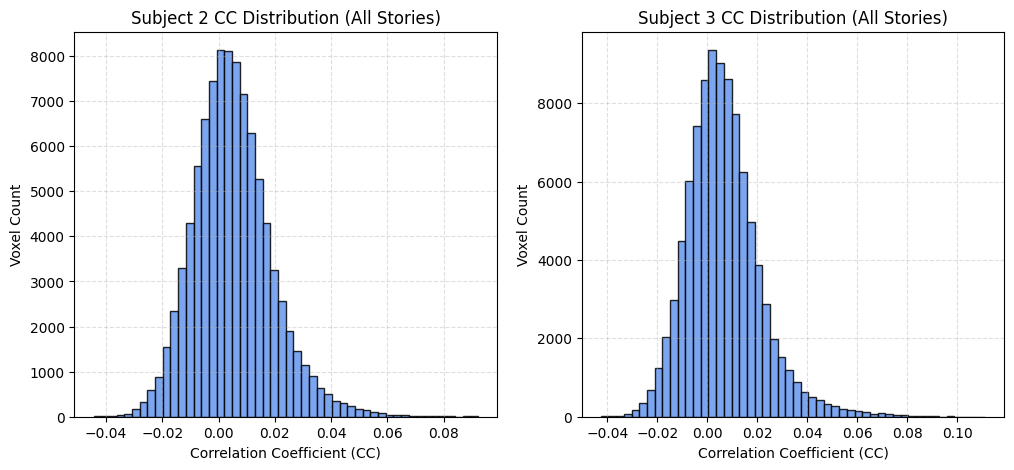

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(ccs_2, bins=50, color='cornflowerblue', edgecolor='black', alpha=0.85)
plt.title(f"Subject 2 CC Distribution (All Stories)")
plt.xlabel("Correlation Coefficient (CC)")
plt.ylabel("Voxel Count")
plt.grid(True, linestyle='--', alpha=0.4)

plt.subplot(1, 2, 2)
plt.hist(ccs_3, bins=50, color='cornflowerblue', edgecolor='black', alpha=0.85)
plt.title(f"Subject 3 CC Distribution (All Stories)")
plt.xlabel("Correlation Coefficient (CC)")
plt.ylabel("Voxel Count")
plt.grid(True, linestyle='--', alpha=0.4)

In [5]:
from ridge_utils.ridge import bootstrap_ridge
alphas = np.logspace(0, 2, 10)
wt_3, corrs_3, valphas_3, allRcorrs_3, valinds_3 = bootstrap_ridge(
    X_train, Y_train, X_test, Y_test, alphas, 15, 10, 500)
print(f"Mean CC:    {np.mean(corrs_3):.4f}")
print(f"Median CC:  {np.median(corrs_3):.4f}")
print(f"Top 1% CC:  {np.percentile(corrs_3, 99):.4f}")
print(f"Top 5% CC:  {np.percentile(corrs_3, 95):.4f}")

Mean CC:    0.0153
Median CC:  0.0115
Top 1% CC:  0.0861
Top 5% CC:  0.0569


In [ ]:
with open('best_ccs_3.pkl', 'wb') as f:
    pickle.dump(corrs_3, f)

In [18]:
with open('best_ccs_2.pkl', 'rb') as f:
    best_ccs_2 = pickle.load(f)
with open('best_ccs_3.pkl', 'rb') as f:
    best_ccs_3 = pickle.load(f)

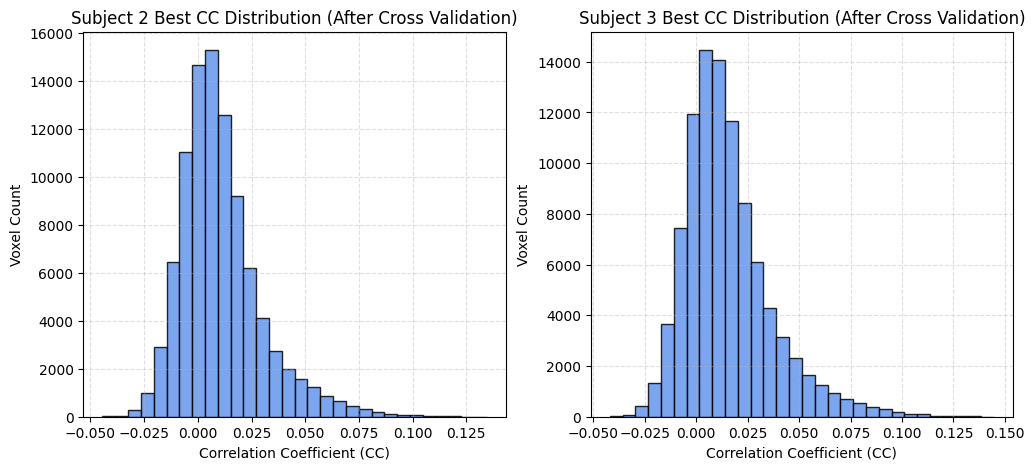

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(best_ccs_2, bins=30, color='cornflowerblue', edgecolor='black', alpha=0.85)
plt.title(f"Subject 2 Best CC Distribution (After Cross Validation)")
plt.xlabel("Correlation Coefficient (CC)")
plt.ylabel("Voxel Count")
plt.grid(True, linestyle='--', alpha=0.4)

plt.subplot(1, 2, 2)
plt.hist(best_ccs_3, bins=30, color='cornflowerblue', edgecolor='black', alpha=0.85)
plt.title(f"Subject 3 Best CC Distribution (After Cross Validation)")
plt.xlabel("Correlation Coefficient (CC)")
plt.ylabel("Voxel Count")
plt.grid(True, linestyle='--', alpha=0.4)